##データの入手

In [1]:
data = read.csv("http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.csv",
                stringsAsFactors=F, na.strings=c("","NA"))

Data obtained from http://biostat.mc.vanderbilt.edu/DataSets

##データの確認

survived: 1（生存），0（死亡）  
pclass: 乗客の社会経済的地位（1:上流，2:中流，3:下流）  
name: 氏名  
sex: 性別  
age: 年齢  
sibsp: 同乗したSibling/Spouseの数  
parch: 同乗したParent/Childrenの数  
ticket: チケットナンバー  
fare: 乗船料金  
cabin: 船室番号  
embarked: 乗船場（C = Cherbourg, Q = Queenstown; S = Southampton）  
boat: Lifeboat  
body:  Body Identification Number  
home.dest:  Home/Destination

In [2]:
str(data)

'data.frame':	1309 obs. of  14 variables:
 $ pclass   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ survived : int  1 1 0 0 0 1 1 0 1 0 ...
 $ name     : chr  "Allen, Miss. Elisabeth Walton" "Allison, Master. Hudson Trevor" "Allison, Miss. Helen Loraine" "Allison, Mr. Hudson Joshua Creighton" ...
 $ sex      : chr  "female" "male" "female" "male" ...
 $ age      : num  29 0.92 2 30 25 48 63 39 53 71 ...
 $ sibsp    : int  0 1 1 1 1 0 1 0 2 0 ...
 $ parch    : int  0 2 2 2 2 0 0 0 0 0 ...
 $ ticket   : chr  "24160" "113781" "113781" "113781" ...
 $ fare     : num  211 152 152 152 152 ...
 $ cabin    : chr  "B5" "C22 C26" "C22 C26" "C22 C26" ...
 $ embarked : chr  "S" "S" "S" "S" ...
 $ boat     : chr  "2" "11" NA NA ...
 $ body     : int  NA NA NA 135 NA NA NA NA NA 22 ...
 $ home.dest: chr  "St Louis, MO" "Montreal, PQ / Chesterville, ON" "Montreal, PQ / Chesterville, ON" "Montreal, PQ / Chesterville, ON" ...


##欠損値の確認

In [3]:
sapply(data, function(x) sum(is.na(x))) / nrow(data)

pclass     survived         name          sex          age        sibsp 
0.0000000000 0.0000000000 0.0000000000 0.0000000000 0.2009167303 0.0000000000 
       parch       ticket         fare        cabin     embarked         boat 
0.0000000000 0.0000000000 0.0007639419 0.7746371276 0.0015278839 0.6287242170 
        body    home.dest 
0.9075630252 0.4308632544

##特徴量の選択

欠損値の多い特徴量や，分析に有効でなさそうな特徴量を削除します．  
※本来特徴量の選択は分析の試行錯誤のなかで行うべきですが，演習の都合上最初に行っています．

In [4]:
data2 <- subset(data, select=-c(name, ticket, cabin, boat, body, home.dest))

## データの可視化

カテゴリデータ（pclass, embarked, sex）は積み上げ棒グラフにして  
変数の割合と，変数内の生死の割合を可視化

ERROR: Error in file(con, "rb"):  コネクションを開くことができません 


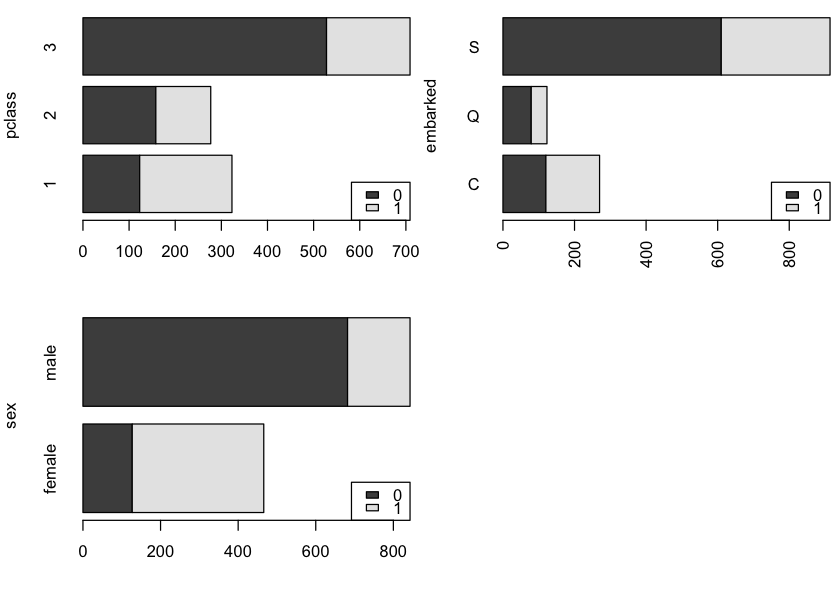

In [5]:
options(repr.plot.width = 7)
options(repr.plot.height = 5)
par(mfrow=c(2,2), mar=c(4,4,.5,.5))

cnt <- table(data2$survived, data2$pclass)
barplot(cnt, horiz=T, legend=rownames(cnt), args.legend=list(x="bottomright"),
        ylab="pclass")

cnt <- table(data2$survived, data2$embarked)
barplot(cnt, horiz=T, las=2, legend=rownames(cnt), args.legend=list(x="bottomright"),
        ylab="embarked")

cnt <- table(data2$survived, data2$sex)
barplot(cnt, horiz=T, legend=rownames(cnt), args.legend=list(x="bottomright"),
        ylab="sex")

数値データ（age, sibsp, parch, fare）は生／死ごとにヒストグラムで可視化

ERROR: Error in file(con, "rb"):  コネクションを開くことができません 


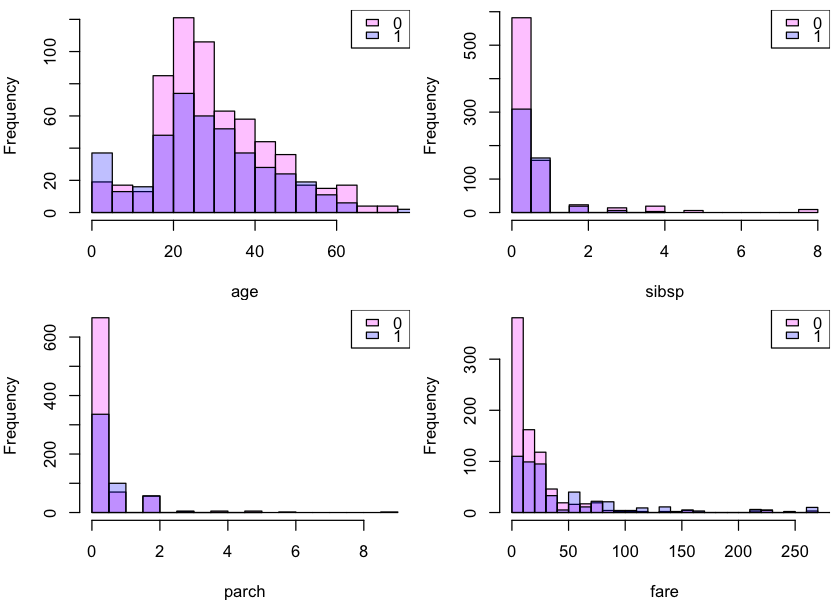

In [6]:
options(repr.plot.width = 7)
options(repr.plot.height = 5)
par(mfrow=c(2,2), mar=c(4,4,.5,.5))

hist(data2$age[data2$survived==0], breaks=20, xlab="age", main="",
     col="#ff00ff40")
hist(data2$age[data2$survived==1], breaks=20, add=T, col="#0000ff40")
legend("topright", c("0", "1"), fill=c("#ff00ff40", "#0000ff40"))

hist(data2$sibsp[data2$survived==0], breaks=20, xlab="sibsp", main="",
     col="#ff00ff40")
hist(data2$sibsp[data2$survived==1], breaks=10, add=T, col="#0000ff40")
legend("topright", c("0", "1"), fill=c("#ff00ff40", "#0000ff40"))

hist(data2$parch[data2$survived==0], breaks=20, xlab="parch", main="",
     col="#ff00ff40")
hist(data2$parch[data2$survived==1], breaks=10, add=T, col="#0000ff40")
legend("topright", c("0", "1"), fill=c("#ff00ff40", "#0000ff40"))

hist(data2$fare[data2$survived==0], breaks=20, xlab="fare", main="",
     col="#ff00ff40")
hist(data2$fare[data2$survived==1], breaks=40, add=T, col="#0000ff40")
legend("topright", c("0", "1"), fill=c("#ff00ff40", "#0000ff40"))

#### 特徴量同士の関係を可視化  
カテゴリデータ同士の関係はクロス集計（Cross tabulation）で可視化  
※parch, sibspは数値データですが，取りうる値が限られているためクロス集計を利用

In [7]:
table(data2$embarked, data2$pclass, deparse.level=2)
table(data2$embarked, data2$sex, deparse.level=2)
table(data2$embarked, data2$sibsp, deparse.level=2)
table(data2$embarked, data2$parch, deparse.level=2)
table(data2$pclass, data2$sex, deparse.level=2)
table(data2$pclass, data2$sibsp, deparse.level=2)
table(data2$pclass, data2$parch, deparse.level=2)
table(data2$sex, data2$sibsp, deparse.level=2)
table(data2$sex, data2$parch, deparse.level=2)
table(data2$sibsp, data2$parch, deparse.level=2)

              data2$pclass
data2$embarked   1   2   3
             C 141  28 101
             Q   3   7 113
             S 177 242 495

              data2$sex
data2$embarked female male
             C    113  157
             Q     60   63
             S    291  623

              data2$sibsp
data2$embarked   0   1   2   3   4   5   8
             C 171  90   9   0   0   0   0
             Q 100  14   4   0   5   0   0
             S 618 215  29  20  17   6   9

              data2$parch
data2$embarked   0   1   2   3   4   5   6   9
             C 196  51  20   3   0   0   0   0
             Q 114   7   1   0   0   1   0   0
             S 690 112  92   5   6   5   2   2

            data2$sex
data2$pclass female male
           1    144  179
           2    106  171
           3    216  493

            data2$sibsp
data2$pclass   0   1   2   3   4   5   8
           1 198 113   8   4   0   0   0
           2 182  82  12   1   0   0   0
           3 511 124  22  15  22   6   9

            data2$parch
data2$pclass   0   1   2   3   4   5   6   9
           1 242  50  27   2   2   0   0   0
           2 206  43  25   3   0   0   0   0
           3 554  77  61   3   4   6   2   2

         data2$sibsp
data2$sex   0   1   2   3   4   5   8
   female 262 160  19  12   7   2   4
   male   629 159  23   8  15   4   5

         data2$parch
data2$sex   0   1   2   3   4   5   6   9
   female 293  88  69   6   4   4   1   1
   male   709  82  44   2   2   2   1   1

           data2$parch
data2$sibsp   0   1   2   3   4   5   6   9
          0 790  52  43   2   2   2   0   0
          1 183  90  29   5   4   4   2   2
          2  26   9   6   1   0   0   0   0
          3   3   9   8   0   0   0   0   0
          4   0  10  12   0   0   0   0   0
          5   0   0   6   0   0   0   0   0
          8   0   0   9   0   0   0   0   0

数値データとカテゴリデータの関係は箱ひげ図（boxplot）で可視化

ERROR: Error in file(con, "rb"):  コネクションを開くことができません 


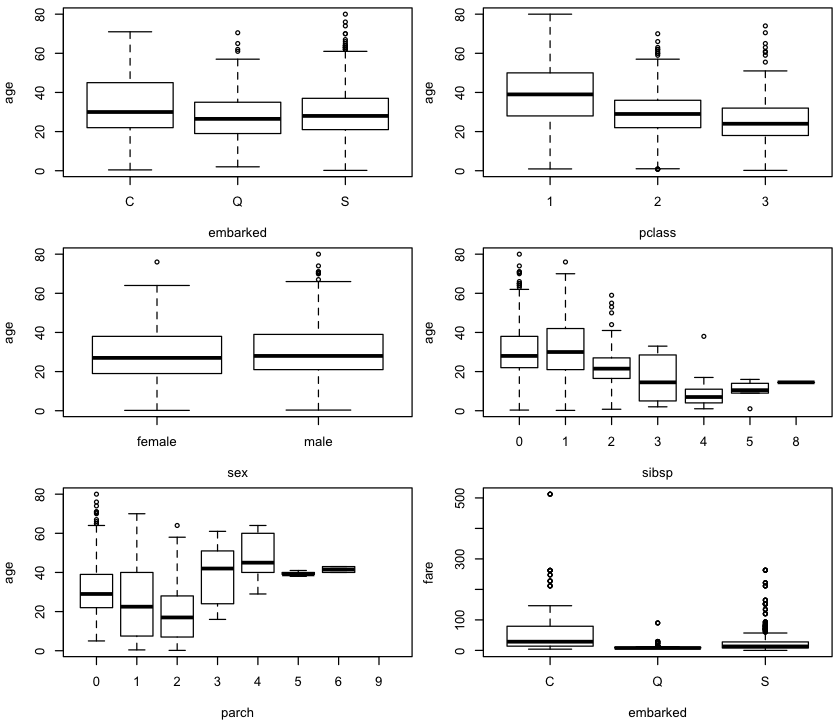

In [8]:
options(repr.plot.width = 7)
options(repr.plot.height = 6)
par(mfrow=c(3,2), mar=c(4,4,.5,.5))
plot(factor(data2$embarked), data2$age, xlab="embarked", ylab="age")
plot(factor(data2$pclass), data2$age, xlab="pclass", ylab="age")
plot(factor(data2$sex), data2$age, xlab="sex", ylab="age")
plot(factor(data2$sibsp), data2$age, xlab="sibsp", ylab="age")
plot(factor(data2$parch), data2$age, xlab="parch", ylab="age")
plot(factor(data2$embarked), data2$fare, xlab="embarked", ylab="fare")

ERROR: Error in file(con, "rb"):  コネクションを開くことができません 


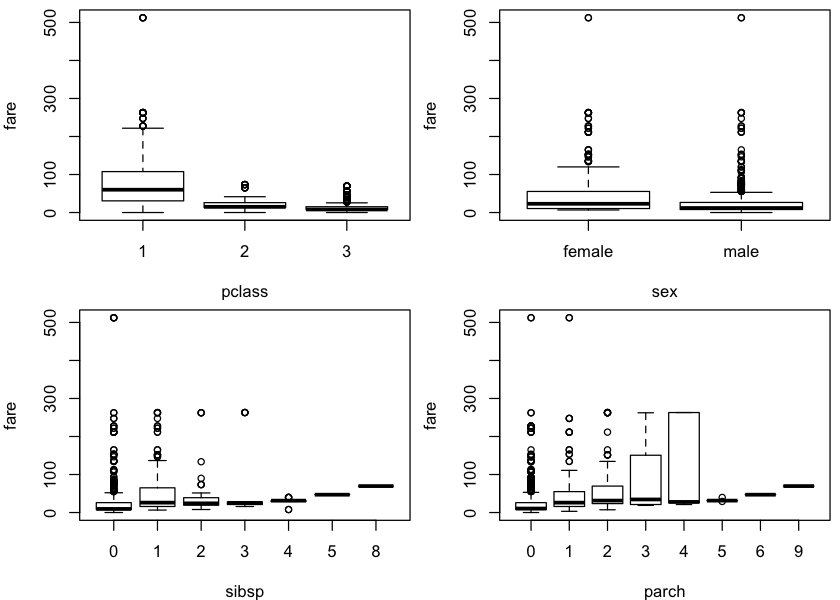

In [9]:
options(repr.plot.width=7)
options(repr.plot.height=5)
par(mfrow=c(2,2), mar=c(4,4,.5,.5))
plot(factor(data2$pclass), data2$fare, xlab="pclass", ylab="fare")
plot(factor(data2$sex), data2$fare, xlab="sex", ylab="fare")
plot(factor(data2$sibsp), data2$fare, xlab="sibsp", ylab="fare")
plot(factor(data2$parch), data2$fare, xlab="parch", ylab="fare")

数値データ同士の関係は散布図（Scatter plot）で可視化

ERROR: Error in file(con, "rb"):  コネクションを開くことができません 


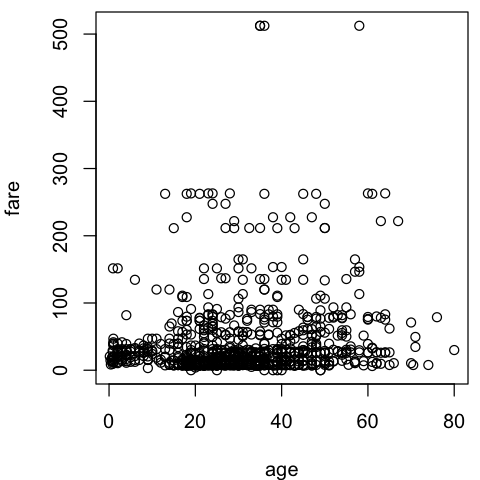

In [10]:
options(repr.plot.width=4)
options(repr.plot.height=4)
par(mfrow=c(1,1), mar=c(4,4,.5,.5))
plot(data2$age, data2$fare, xlab="age", ylab="fare")

## 欠損値の処理

今回は，数値データは中央値で，カテゴリデータは最頻値で補間します．  
ただし，運賃（fare）は社会経済的地位（pclass）と相関があるため※  
等級ごとの中央値で補間します．  
※pclassとfareの可視化結果（boxplot）参照

In [11]:
age_median <- median(data2$age, na.rm=T)
embarked_mode <- names(which.max(table(data2$embarked)))
fare_median_c1 <- median(data2$fare[data2$pclass==1], na.rm=T)
fare_median_c2 <- median(data2$fare[data2$pclass==2], na.rm=T)
fare_median_c3 <- median(data2$fare[data2$pclass==3], na.rm=T)

In [12]:
data2$age[is.na(data2$age)] <- age_median
data2$embarked[is.na(data2$embarked)] <- embarked_mode
data2$fare[data2$pclass==1 & is.na(data2$fare)] <- fare_median_c1
data2$fare[data2$pclass==2 & is.na(data2$fare)] <- fare_median_c2
data2$fare[data2$pclass==3 & is.na(data2$fare)] <- fare_median_c3

In [13]:
sapply(data2, function(x) sum(is.na(x))) / nrow(data2)

pclass survived      sex      age    sibsp    parch     fare embarked 
       0        0        0        0        0        0        0        0

## カテゴリ変数の処理

Rでは特徴量の型を因子型(factor)にしておくと  
分析時にダミー変数を利用して処理してくれることが多いです．

In [14]:
data2$pclass <- factor(data2$pclass)
data2$survived <- factor(data2$survived)
data2$embarked <- factor(data2$embarked)
data2$sex <- factor(data2$sex)

## データの標準化

数値データを平均0，分散1に標準化します．

In [15]:
colMean <- as.numeric(sapply(data2[,sapply(data2, is.numeric)], mean))
colSd <- as.numeric(sapply(data2[,sapply(data2, is.numeric)], sd))
data2[,sapply(data2, is.numeric)] <- scale(data2[,sapply(data2, is.numeric)],
                                           center=colMean, scale=colSd)

## モデリング

決定木（Decision tree）を使って生死を予測してみます．  
予測結果は精度（accuracy）で評価します．

$$精度 = \frac{正解数}{データ数}$$

In [16]:
library(rpart)

※Python版に合わせるため，恣意的にcontrolパラメータを設定しています．

In [17]:
clf0 <- rpart(survived~., data=data2, method="class", 
              control=rpart.control(cp=1e-10, xval=1, minsplit=1, minbucket=1))

In [18]:
confusion_matrix <- table(data2$survived, predict(clf0, newdata=data2, type="class"))
sum(diag(confusion_matrix)) / sum(confusion_matrix)

[1] 0.9656226

## グリッドサーチと交差検証

registerDoMCのcoresはPCのコア数に応じて設定してください．

In [19]:
library(caret, quietly=T)
library(doMC, quietly=T)
registerDoMC(cores=4)

In [20]:
set.seed(1)
clf1 <- train(survived~., data=data2, method="rpart", tuneLength=5,
              trControl=trainControl(method="cv", number=10))

In [21]:
clf1$result[which.max(clf1$results$Accuracy),]

,cp,Accuracy,Kappa,AccuracySD,KappaSD
1,0.005,0.8074985,0.5737025,0.0301985,0.07122872


## 学習曲線

In [22]:
calc_cv_train_score <- function(data, K, cp){
    n <- nrow(data)
    K <- 10
    set.seed(1)
    grp <- factor(sample.int(n) %/% ceiling(n / K) + 1)
    score_cv <- c()
    score_train <- c()
    for(k in 1:K){
        clf_cv <- rpart(survived~., data=data[grp!=k,], method="class", cp=cp)
        pred <- predict(clf_cv, newdata=data[grp!=k,], type="class")
        cm <- table(data$survived[grp!=k], pred)
        score_train <- c(score_train, sum(diag(cm)) / sum(cm))
        pred <- predict(clf_cv, newdata=data[grp==k,], type="class")
        cm <- table(data$survived[grp==k], pred)
        score_cv <- c(score_cv, sum(diag(cm)) / sum(cm))
    }
    res <- list("score_train"=mean(score_train), "score_cv"=mean(score_cv))
    res
}

In [23]:
set.seed(1)
score_train <- c()
score_cv <- c()
for(r in seq(0.1, 1, 0.1)){
    res <- calc_cv_train_score(data2[sample.int(nrow(data2), r*nrow(data2)),], 5,
                              clf1$result$cp[which.max(clf1$results$Accuracy)])
    score_train <- c(score_train, res$score_train)
    score_cv <- c(score_cv, res$score_cv)
}

ERROR: Error in file(con, "rb"):  コネクションを開くことができません 


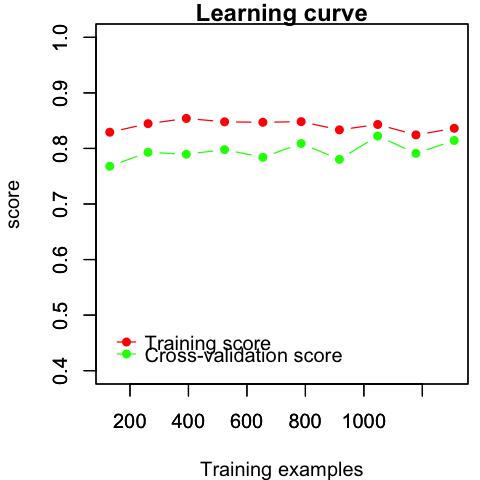

In [24]:
options(repr.plot.width=4)
options(repr.plot.height=4)
par(mfrow=c(1,1), mar=c(4,4,1,.5))
plot(seq(0.1, 1, 0.1)*nrow(data2), score_train, type="b", pch=16, col="red",
     ylim=c(0.4, 1), xlab="Training examples", ylab="score", main="Learning curve")
par(new=T)
plot(seq(0.1, 1, 0.1)*nrow(data2), score_cv, type="b", pch=16, col="green",
     ylim=c(0.4, 1), ann=F)
legend("bottomleft", c("Training score", "Cross-validation score"), lty=2,
       pch=16, col=c("red", "green"), inset=.05, bty="n")

学習曲線をみると，  

+ 訓練スコアが低い  
+ 訓練スコアと交差検証スコアの差が小さい  

ことから，**ハイバイアス**な状態であると分かります．

そこで，性能改善のために，  

+ 柔軟性の高いモデルに変更する  
+ 特徴量を追加する  

を検討してみます．

## モデルの変更

モデルをより柔軟性の高い，アンサンブル学習（ブースティング）を利用したgbmに変更してみます．

In [25]:
library(gbm, quietly=T)


Attaching package: ‘survival’

The following object is masked from ‘package:caret’:

    cluster

Loaded gbm 2.1.1


In [26]:
set.seed(1)
clf2 <- train(survived~., data=data2, method="gbm",
              trControl=trainControl(method="cv", number=10),
              tuneLength=15,
              verbose=FALSE)

Loading required package: plyr


In [27]:
clf2$result[which.max(clf2$results$Accuracy),]

,shrinkage,interaction.depth,n.minobsinnode,n.trees,Accuracy,Kappa,AccuracySD,KappaSD
181,0.1,13,10,50,0.8181973,0.6042272,0.03205692,0.07246256


| グリッドサーチ＋交差検証 | モデル変更
| -: |-------------: 
|0.807| 0.818

## 特徴量の追加，変更

欠損率が高く利用を見送っていた**cabin**の情報を利用してみます．  
cabinは文字＋数値という形なので，文字と数値に分離して利用します．

In [28]:
data3 <- data2

In [29]:
data3$cabin <- sapply(as.character(data$cabin),
                      FUN=function(x){substring(strsplit(x, " ")[[1]][1], 1, 1)})
data3$cabin[is.na(data3$cabin)] <- "unknown"
data3$cabin <- as.factor(data3$cabin)
data3$cabin_room <- sapply(as.character(data$cabin),
                           FUN=function(x){as.numeric(substring(strsplit(x, " ")[[1]][1], 2))})
data3$cabin_room[is.na(data3$cabin_room)] <- 0

In [30]:
set.seed(1)
suppressWarnings(
clf3 <- train(survived~., data=data3, method="gbm",
              trControl=trainControl(method="cv", number=10),
              tuneLength=15,
              verbose=FALSE)
)

In [31]:
clf3$result[which.max(clf3$results$Accuracy),]

,shrinkage,interaction.depth,n.minobsinnode,n.trees,Accuracy,Kappa,AccuracySD,KappaSD
63,0.1,5,10,150,0.8219906,0.6148527,0.02842447,0.06343809


| グリッドサーチ＋交差検証 | モデル変更 | cabin利用 
| -: |-------------: | -: 
|0.807| 0.818 | 0.822

単純に中央値で補間していた年齢の欠損値を，その他の特徴量を使って予測してみます．

In [32]:
data4 <- data3
title <- as.character(sub(' ', '', sapply(data$name, FUN=function(x) {strsplit(x, split='[,.]')[[1]][2]})))
data4$immature <- ifelse(title %in% c("Master", "Mlle", "Miss"), 1, 0)
data4 <- subset(data4, select=c("pclass", "age", "sibsp", "parch", "fare", "immature"))

In [33]:
set.seed(1)
clf_age <- train(age~., data=data4[!is.na(data$age),], method="rpart", tuneLength=10,
                 trControl=trainControl(method="cv", number=10))

Warning message:
In nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, : There were missing values in resampled performance measures.

In [34]:
clf_age$result[which.max(clf_age$results$RMSE),]

,cp,RMSE,Rsquared,RMSESD,RsquaredSD
10,0.2105439,1.083399,0.1464117,0.1044172,0.04869529


In [35]:
data3$age[is.na(data$age)] <- predict(clf_age, newdata=data4[is.na(data$age),])

In [36]:
set.seed(1)
suppressWarnings(
clf4 <- train(survived~., data=data3, method="gbm",
              trControl=trainControl(method="cv", number=10),
              tuneLength = 15,
              verbose=FALSE)
)

In [37]:
clf4$result[which.max(clf4$results$Accuracy),]

,shrinkage,interaction.depth,n.minobsinnode,n.trees,Accuracy,Kappa,AccuracySD,KappaSD
49,0.1,4,10,200,0.8265825,0.6230431,0.03358724,0.0759023


| グリッドサーチ＋交差検証 | モデル変更 | cabin利用 | age予測 
| -: |-------------: | -: | -: 
|0.807| 0.818 | 0.822 | 0.827 